# Vicherey 

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sales_2021 = pd.read_csv('V_Ventes produits par jour 2021.csv', sep=";", encoding='latin-1')
sales_2020 = pd.read_csv('V_Ventes produits par jour 2020.csv', sep=";", encoding='latin-1')
sales_2019 = pd.read_csv('V_Ventes produits par jour 2019.csv', sep=";", encoding='latin-1')

sales = sales_2020.merge(sales_2021, how='outer', on = ['Date facture','Désignation','Qté'])[['Date facture',
                                                                                              'Désignation','Qté']]

In [164]:
sales['Date'] = pd.to_datetime(sales['Date facture'], dayfirst=True)
sales = sales.drop('Date facture', axis=1)

In [165]:
sales.columns = ['Name','Quantity','Date']
sales

,Name,Quantity,Date
0,ALUSPRAY BOMBE,1,2020-01-02
1,VETRIGEN,1,2020-01-02
2,BIOVEINE GLU CA+,4,2020-01-02
3,BOVIFERM PLUS,1,2020-01-02
4,CANDILAT VEAUX 20 ML,2,2020-01-02
...,...,...,...
16346,DEXALONE SOLUTION 1ML,3,2021-11-22
16347,SHOTAPEN 1 ML,1,2021-11-22
16348,TERRAMYCINE LA 1ML,1,2021-11-22
16349,KETODOLOR 100MG 100 ML,1,2021-11-22


In [166]:
products = sales.groupby('Name').sum('Quantity')
top5_q = products.nlargest(6,'Quantity').drop('SHOTAPEN 1 ML')
top5 = top5_q.index

In [167]:
top5

Index(['TOLFINE INJ 250ML', 'SHOTAPEN', 'MASTIJET', 'OXYTETRIN SPRAY 220G',
       'TENALINE LA'],
      dtype='object', name='Name')

In [168]:
sales_top5 = sales[[sales['Name'][i] in top5 for i in sales.index]]

In [169]:
sales_top5

,Name,Quantity,Date
34,MASTIJET,11,2020-01-02
38,TOLFINE INJ 250ML,19,2020-01-02
47,SHOTAPEN,1,2020-01-02
48,SHOTAPEN,3,2020-01-02
53,TENALINE LA,2,2020-01-02
...,...,...,...
16170,OXYTETRIN SPRAY 220G,3,2021-11-15
16188,SHOTAPEN,1,2021-11-15
16254,SHOTAPEN,1,2021-11-16
16255,SHOTAPEN,1,2021-11-16


In [170]:
sales_top5['Month'] = [sales_top5['Date'][i].replace(day=1) for i in sales_top5.index]

C:\Users\clara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
monthly = sales_top5.groupby(['Month','Name'],as_index=False).sum('Quantity')

In [172]:
daily = sales_top5.groupby(['Date','Name'],as_index=False).sum(['Quantity'])

In [173]:
monthly

,Month,Name,Quantity
0,2020-01-01,MASTIJET,17
1,2020-01-01,OXYTETRIN SPRAY 220G,7
2,2020-01-01,SHOTAPEN,15
3,2020-01-01,TENALINE LA,6
4,2020-01-01,TOLFINE INJ 250ML,26
...,...,...,...
110,2021-11-01,MASTIJET,4
111,2021-11-01,OXYTETRIN SPRAY 220G,4
112,2021-11-01,SHOTAPEN,4
113,2021-11-01,TENALINE LA,4


In [174]:
ticks = monthly['Month'].unique()
labels = [pd.Timestamp(ticks[i]).month_name()[:3] + '20' if pd.Timestamp(ticks[i]).year == 2020 
          else pd.Timestamp(ticks[i]).month_name()[:3] + '21' for i in range(len(ticks))]

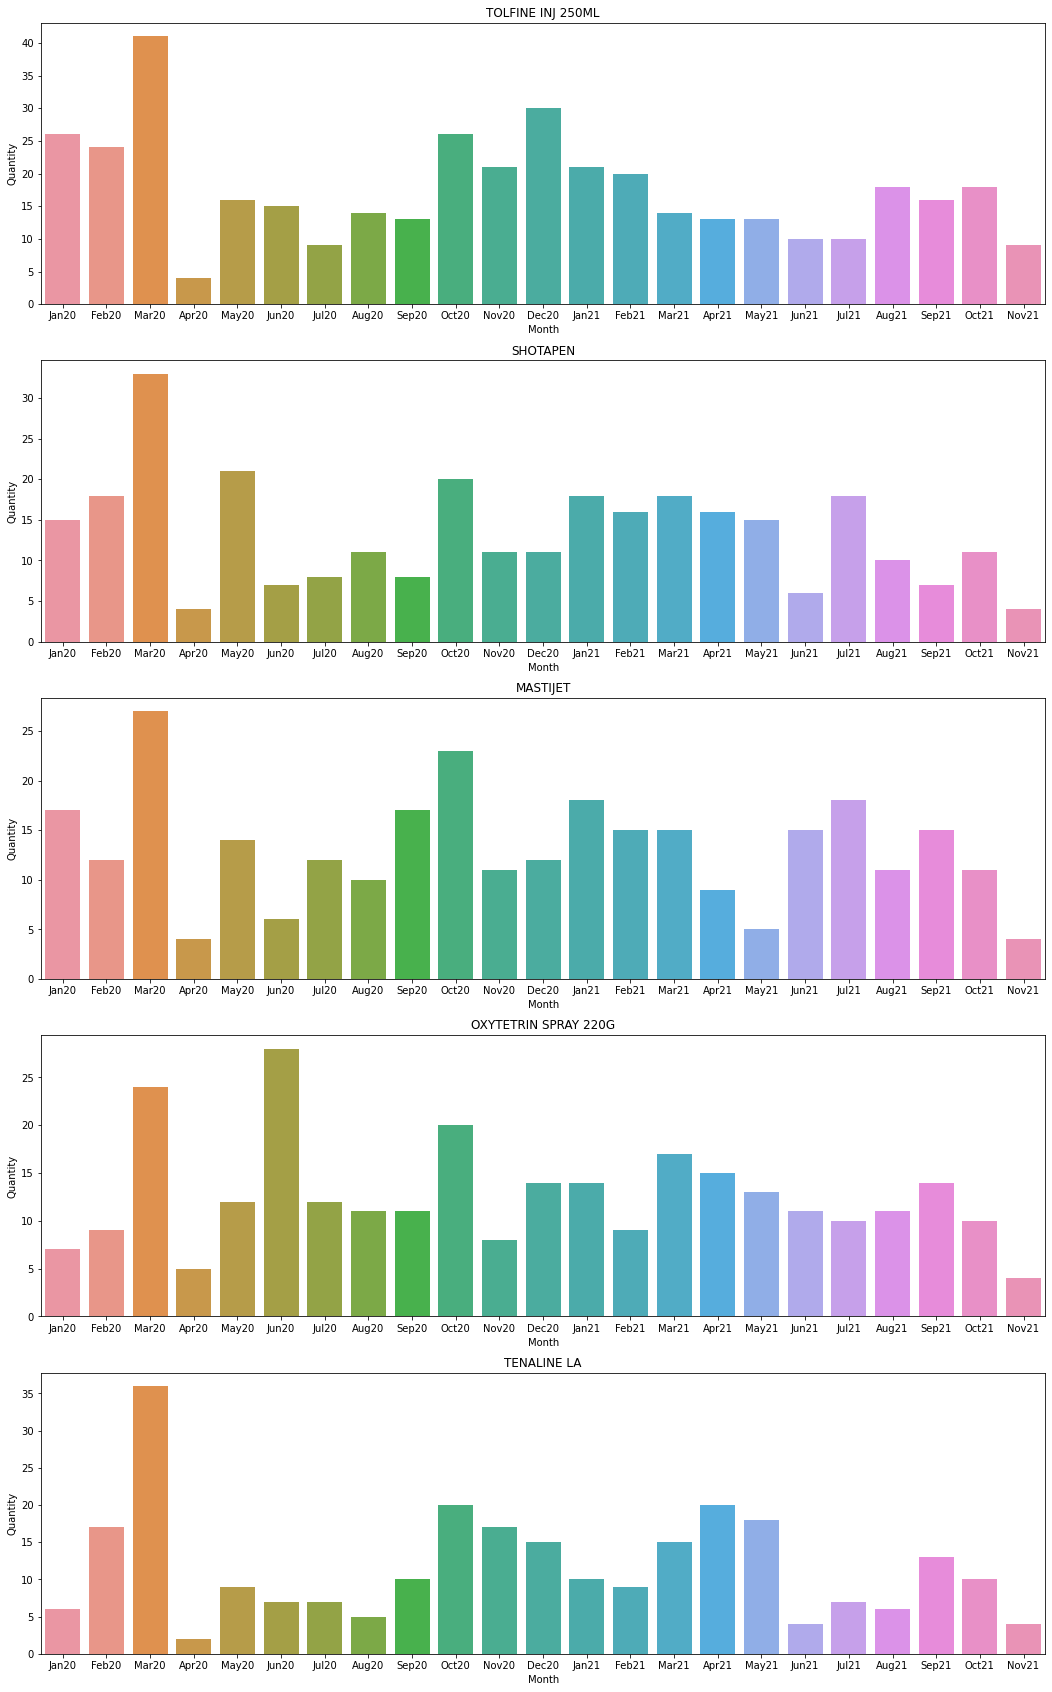

In [175]:
fig, axs = plt.subplots(5,1,figsize =(18,30))
#plt.setp(axs, xticks=ticks,xticklabels=labels)
for i in range(0,5):
    sns.barplot(data=monthly[monthly['Name']==top5[i]],x='Month',y='Quantity',ax=axs[i])
    axs[i].set_title(top5[i])
    #axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(labels)